# MCIT Amazon Product Reviews Use Case 2 

#### In this notebook, we need to classify reviews as positive or negative for dataset about amazon product reviews, so we will make NLP then build, train and evaluate ML model to predict customers reviews as positive or negative.

#### Here are the main steps we will go through:

<a href="#1">1.Read the dataset</a><br>
<a href="#2">2.Explore the dataset </a><br>
<a href="#3">3.Natural Language Processing </a><br>
<a href="#4">4.Select a model and train it</a><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <a name="1">1. Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [2]:
df = pd.read_csv('1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## <a name="2">2. Explore the dataset</a>
(<a href="#0">Go to top</a>)

Let's explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
df.shape

(34660, 21)

Since we are interested in 'reviews.text','reviews.rating' columns

In [5]:
df_review = df[['reviews.text','reviews.rating']]

In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [7]:
df_review.shape

(34660, 2)

In [8]:
df_review.isna().sum()

reviews.text       1
reviews.rating    33
dtype: int64

In [9]:
df_review = df_review.dropna()

In [10]:
df_review.isna().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [11]:
df_review.shape

(34626, 2)

In [12]:
df_review.duplicated().sum()

0

In [13]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34626 non-null  object 
 1   reviews.rating  34626 non-null  float64
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [14]:
df_review['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

Since we will consider ratings 5, 4 are positive and the rest negative

In [15]:
df_review['reviews.rating'] = df_review['reviews.rating'].apply(lambda x: 1 if x == 5 or x == 4 else 0)

In [16]:
df_review['reviews.rating'].value_counts()

1    32315
0     2311
Name: reviews.rating, dtype: int64

We should  notice that we have imbalanced dataset

## <a name="3">3. Natural Language Processing</a>
(<a href="#0">Go to top</a>)

Let's clean our text data

In [17]:
import re, string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
#Lowercase our text
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: x.lower())
#Get rid of leading / trailing whitespace
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: x.split())
#Remove HTML tags / markups
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.compile('<.*?>').sub('', str(x)))  
#Replace punctuation with space       
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ',str(x)))
#Remove extra space and tabs
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.sub('\s+', ' ', x))


In [19]:
df_review['reviews.text'].head()

0     this product so far has not disappointed my c...
1     great for beginner or experienced person boug...
2     inexpensive tablet for him to use and learn o...
3     i ve had my fire hd two weeks now and i love ...
4     i bought this for my grand daughter when she ...
Name: reviews.text, dtype: object

In [20]:
snow = SnowballStemmer('english')
#Remove not from stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')    
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([snow.stem(word) for word in nltk.word_tokenize(sentence) if not word in set(all_stopwords)]))
    

In [21]:
df_review['reviews.text']

0        product far not disappoint children love use l...
1           great beginn experienc person bought gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        bought grand daughter come visit set user ente...
                               ...                        
34655    not appreci faster higher amp charger use kind...
34656    amazon includ charger kindl fact charg us extr...
34657    love kindl fire realli disappoint kindl power ...
34658    surpris find not come type charg cord purchas ...
34659    spite fact noth good thing say amazon anth eve...
Name: reviews.text, Length: 34626, dtype: object

In [22]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize a Sentence with the appropriate POS tag
df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]))


In [23]:
df_review['reviews.text']

0        product far not disappoint child love use like...
1           great beginn experienc person bought gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        bought grand daughter come visit set user ente...
                               ...                        
34655    not appreci faster high amp charger use kindl ...
34656    amazon includ charger kindl fact charg u extra...
34657    love kindl fire realli disappoint kindl power ...
34658    surpris find not come type charg cord purchas ...
34659    spite fact noth good thing say amazon anth eve...
Name: reviews.text, Length: 34626, dtype: object

In [24]:
# #Another way of Lemmatization using spacy
# import spacy

# # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
# nlp = spacy.load('en', disable=['parser', 'ner'])

# sentence = df_review['reviews.text'][0]

# # Parse the sentence using the loaded 'en' model object `nlp`
# doc = nlp(sentence)

# # Extract the lemma for each token and join
# " ".join([token.lemma_ for token in doc])
# #> 'the strip bat be hang on -PRON- foot for good'


In [25]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    34626 non-null  object
 1   reviews.rating  34626 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 811.5+ KB


## <a name="4">4. Select a model and train it</a>
(<a href="#0">Go to top</a>)


In [26]:
X = df_review['reviews.text']
y = df_review['reviews.rating'] 
X

0        product far not disappoint child love use like...
1           great beginn experienc person bought gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        bought grand daughter come visit set user ente...
                               ...                        
34655    not appreci faster high amp charger use kindl ...
34656    amazon includ charger kindl fact charg u extra...
34657    love kindl fire realli disappoint kindl power ...
34658    surpris find not come type charg cord purchas ...
34659    spite fact noth good thing say amazon anth eve...
Name: reviews.text, Length: 34626, dtype: object

Let's split our data 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)

In [28]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(27700,)
Test Set Shape		:(6926,)


### Using CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
X_train = count_vect.fit_transform(X_train)
X_train = X_train.toarray()
X_test = count_vect.transform(X_test)
X_test = X_test.toarray()

In [30]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 8021


In [31]:
# # Assign feature names of vector into a variable
# vocab = count_vect.get_feature_names()

In [32]:
# # Dataframe for train countvectorizer dataset
# pd.DataFrame(X_train, columns = vocab).head()

### Using Naiv Bayes Classifier

In [33]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def predict(predictor, features, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """
    predictions = predictor.predict(features)

    # Calculate accuracy
    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    auc = roc_auc_score(labels, predictions)
    print(f'AUC     : {auc}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix') 


Accuracy: 0.9440072202166065
AUC     : 0.7213557074382158
Precision: 0.962555652802618
Recall: 0.9780759415358441
F1_score: 0.9702537350645365


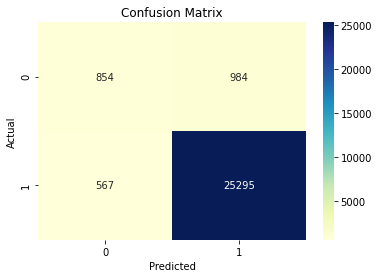

In [35]:
predict(naive, X_train, y_train)

Accuracy: 0.9350274328616807
AUC     : 0.6575383755494684
Precision: 0.9526466596290152
Recall: 0.9789245312257865
F1_score: 0.9656068480586976


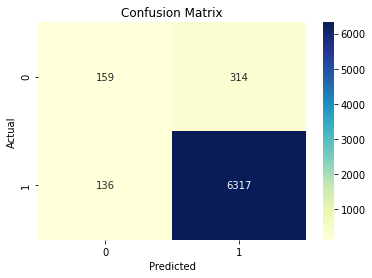

In [36]:
predict(naive, X_test, y_test)

### Trying oversampling (SMOTE) 

Since we have imbalanced data let's try overampling and watch our model performance

Here we use the cleaned data

In [37]:
df_review_sm = df_review[['reviews.text','reviews.rating']]
df_review_sm.head()

,reviews.text,reviews.rating
0,product far not disappoint child love use like...,1
1,great beginn experienc person bought gift love,1
2,inexpens tablet use learn step nabi thrill lea...,1
3,fire hd two week love tablet great valu prime ...,1
4,bought grand daughter come visit set user ente...,1


In [38]:
df_review_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    34626 non-null  object
 1   reviews.rating  34626 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 811.5+ KB


In [39]:
X_sm = df_review_sm['reviews.text']
y_sm = df_review_sm['reviews.rating']

In [40]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, shuffle=True, random_state=23)

In [41]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train_sm.shape, X_test.shape))

Train Set Shape		:(27700,)
Test Set Shape		:(6926, 8021)


Using CountVectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the word vector with CountVectorizer
count_vect_sm = CountVectorizer(ngram_range=(1,1))
X_train_sm = count_vect_sm.fit_transform(X_train_sm)
X_train_sm = X_train_sm.toarray()
X_test_sm = count_vect_sm.transform(X_test_sm)
X_test_sm = X_test_sm.toarray()

In [43]:
X_train_sm.shape

(27700, 8021)

Since testing data should be a way from our trained model, we will do oversampling only on training data 

In [44]:
from imblearn.over_sampling import SMOTE 
from sklearn.utils import shuffle

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sm, y_train_sm)
X_train_sm, y_train_sm = shuffle(X_train_sm, y_train_sm)



In [45]:
X_train_sm.shape, y_train_sm.shape

((51724, 8021), (51724,))

Using Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB
naive_sm = MultinomialNB()
naive_sm.fit(X_train_sm, y_train_sm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Accuracy: 0.8824723532596087
AUC     : 0.8824723532596086
Precision: 0.8688793585679657
Recall: 0.9008970690588508
F1_score: 0.8845985914156084


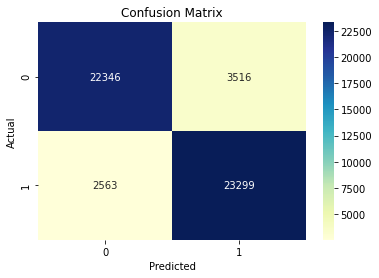

In [47]:
predict(naive_sm, X_train_sm, y_train_sm)

Accuracy: 0.8836269130811435
AUC     : 0.732812212816105
Precision: 0.9655399835119538
Recall: 0.907484890748489
F1_score: 0.9356127176865314


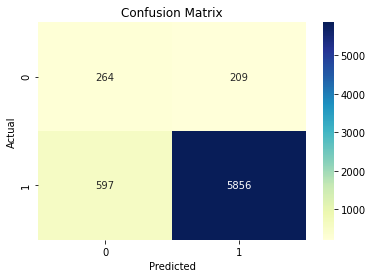

In [48]:
predict(naive_sm, X_test_sm, y_test_sm)